In [18]:
import pandas as pd 
import math
from matplotlib import pyplot as plt

min_len = 100000
df1 = pd.read_csv("Results/project1_out_1.txt",delimiter=' ')
df2 = pd.read_csv("Results/project1_out_2.txt",delimiter=' ')
df4 = pd.read_csv("Results/project1_out_4.txt",delimiter=' ')
df8 = pd.read_csv("Results/project1_out_8.txt",delimiter=' ')
min_len = min(df1.shape[0], df2.shape[0], df4.shape[0], df8.shape[0])

df1 = df1[:min_len]
df2 = df2[:min_len]
df4 = df4[:min_len]
df8 = df8[:min_len]

df = pd.concat([df1, df2, df4, df8])
print(df.shape)
print(df.NbThreads.unique())
print(df.M.unique())
print(df.N.unique())
print(df.d.unique())


(4896, 7)
[1 2 4 8]
[    1    10   100  1000 10000]
[ 10  50 100 200 500]
[0.   0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26
 0.28 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46 0.48 0.5  0.52 0.54
 0.56 0.58 0.6  0.62 0.64 0.66 0.68 0.7  0.72 0.74 0.76 0.78 0.8  0.82
 0.84 0.86 0.88 0.9  0.92 0.94 0.96 0.98 1.  ]


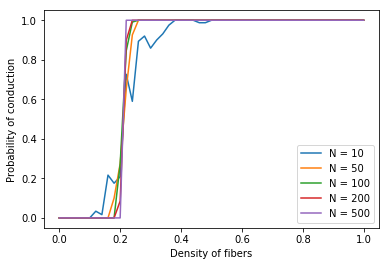

In [19]:
# Plot probability as a function of density for each N
legend = []
grouped_df = df.groupby(['N','d']).mean().reset_index()
for indexN,i in enumerate(df.N.unique()):
    subdf_PerN = grouped_df[grouped_df['N'] == i]
    plt.plot(subdf_PerN.d, subdf_PerN.Probability)

    legend.append('N = {}'.format(df.N.unique()[indexN]))
plt.ylabel("Probability of conduction")
plt.xlabel("Density of fibers")
plt.legend(legend, loc  ='lower right')
plt.show()
    


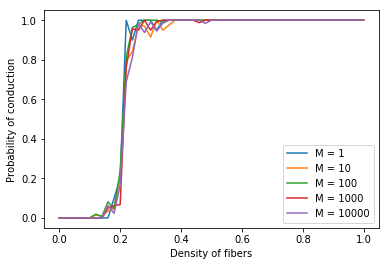

In [20]:
# Plot probability as a function of density for each M
legend = []
grouped_df = df.groupby(['M','d']).mean().reset_index()
for index,i in enumerate(df.M.unique()):
    subdf_perM = grouped_df[grouped_df['M'] == i]
    plt.plot(subdf_perM.d, subdf_perM.Probability)
    legend.append('M = {}'.format(df.M.unique()[index]))
plt.ylabel("Probability of conduction")
plt.xlabel("Density of fibers")
plt.legend(legend, loc  ='lower right')
plt.show()

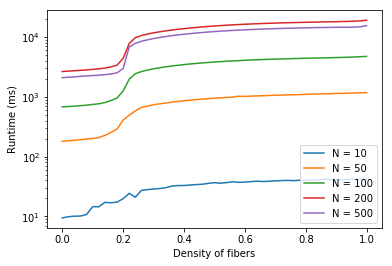

In [21]:
# Plot average time as a function of density
legend = []
grouped_df = df.groupby(['N','d']).mean().reset_index()
for index,i in enumerate(df.N.unique()):
    subdf_perN = grouped_df[grouped_df['N'] == i]
    plt.plot(subdf_perN.d, subdf_perN.AvgTime)
    legend.append('N = {}'.format(df.N.unique()[index]))
plt.ylabel("Runtime (ms)")
plt.xlabel("Density of fibers")
plt.yscale("log")
plt.legend(legend, loc  ='lower right')
plt.show()

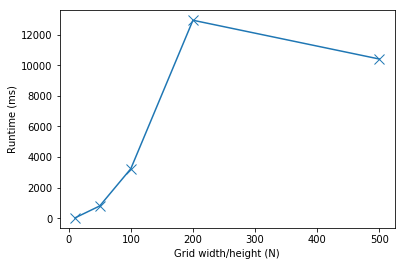

In [22]:
# Plot average time as a function of grid size N
meanTimePerN = []
for index,i in enumerate(df.N.unique()):
    meanTimePerN.append(df[df['N'] == i].AvgTime.mean())
# plt.scatter(df.N.unique(), meanTimePerN, marker='x')
meanTime = [x for y, x in sorted(zip(df.N.unique(), meanTimePerN))]
plt.plot(sorted(df.N.unique()), meanTime, marker='x',markersize=10)
plt.ylabel("Runtime (ms)")
plt.xlabel("Grid width/height (N)")
plt.show()

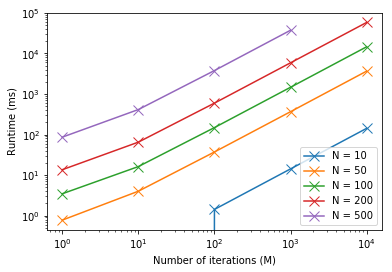

In [23]:
# Plot average time of different M iterations, for each N
legend = []
grouped_df = df.groupby(['N','M']).mean().reset_index()
for indexN,i in enumerate(df.N.unique()):
    subdf_PerN = grouped_df[grouped_df['N'] == i]
    plt.plot(sorted(subdf_PerN.M), sorted(subdf_PerN.AvgTime), marker='x',markersize=10)
    legend.append('N = {}'.format(df.N.unique()[indexN]))
    
plt.ylabel("Runtime (ms)")
plt.xlabel("Number of iterations (M)")
plt.yscale("log")
plt.xscale("log")
plt.legend(legend, loc  ='lower right')
plt.show()

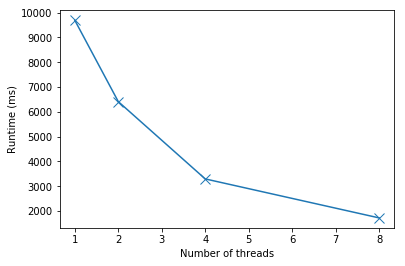

In [24]:
# Plot average time as a function of thread number
meanTimePerNbThreads = []
for index,i in enumerate(df.NbThreads.unique()):
    meanTimePerNbThreads.append(df[df['NbThreads'] == i].AvgTime.mean())
# plt.scatter(df.N.unique(), meanTimePerN, marker='x')
meanTime = [x for y, x in sorted(zip(df.NbThreads.unique(), meanTimePerNbThreads))]
plt.plot(sorted(df.NbThreads.unique()), meanTime, marker='x',markersize=10)
plt.ylabel("Runtime (ms)")
plt.xlabel("Number of threads")
plt.show()